# 1er Parcial Modelos Computacionales II
## Melannie Martínez Velasco

### Instrucciones
1. Reproducir en análisis de PCA aplicando al Iris dataset, utilizando 3 componentes
A) Indicar el porcentaje de la información utilizando los 3 componentes principales
B) Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

2. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv
A) Qué notan de extraño con la columna "Coarseness" al normalizar el dataset?
B) Determinar el porcentaje de aporte de cada vector propio
C) Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos
D) Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados
E) Hacer la comparsión de los pairplot con la data original y la data proyectada

Nota: En el dataset Iris, la variable "Species" era descartada; en el dataset Brain_tumor, descartar la variable 'Class'


In [5]:
# 1: Importar todas las paqueterías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D


In [13]:
# Cargar datos para el dataframe
path = r"C:\Users\melan\OneDrive\Documentos\Escuela\Modelos computacionales\iris.csv"
df = pd.read_csv(path)
df.head() # Primeros datos


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# Descartar columna Species
eliminar = df.drop(columns=['Species'])

In [19]:
# Cargar dataset desde sklearn
iris = datasets.load_iris()
X_iris = iris.data  # Variables numéricas
y_iris = iris.target  # Etiquetas de clase 

# 1. Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

In [21]:
# 2. PCA con 3 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [23]:
# 3. Varianza explicada
var_ratio = pca.explained_variance_ratio_
total_var = np.sum(var_ratio)
print("Varianza por cada componente:", var_ratio)
print("Varianza total explicada:", total_var)

Varianza por cada componente: [0.72962445 0.22850762 0.03668922]
Varianza total explicada: 0.9948212908928452


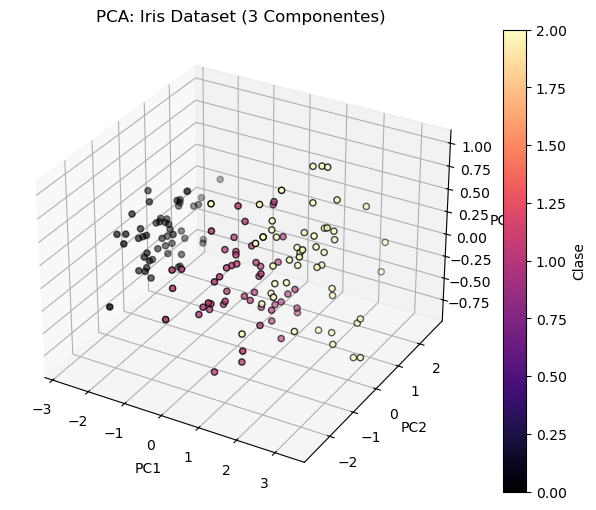

In [27]:
# 4. Gráfico 3D con los datos proyectados
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_iris, cmap="magma", edgecolor="k"
)
ax.set_title("PCA: Iris Dataset (3 Componentes)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(scatter, ax=ax, label="Clase")
plt.show()

# Brain Tumor


In [30]:
# Cargar dataset
path_bt = r"C:\Users\melan\OneDrive\Documentos\Escuela\Modelos computacionales\Brain Tumor.csv"
df = pd.read_csv(path_bt) # Definir path
df.head() # Primeros valores

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [32]:
# Eliminar olumnas 'Image' y 'Class'
df_newbt = df.drop(columns=["Image", "Class"])
df_newbt

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


### "Coarseness" -> muestra los mismos valores .
### Aparece 0 en la desviación estándar de esa columna al normalizar, lo que significa que es una  constante en todos los dato..

In [46]:
# Normalización de datos
scaler = StandardScaler()
scaled_bt = scaler.fit_transform(df_newbt)

# Verificar
print("Media post-normalización:", np.mean(scaled_bt, axis=0)) # Media de cada columna debe ser 0 aprox.
print("Desviación estándar post-normalización es:", np.std(scaled_bt, axis=0)) # Desviación estándar de cada columna debe ser 1 aprox.

Media post-normalización: [ 1.43543987e-016 -1.28434094e-016  2.94642921e-016 -1.81318720e-016
  9.82143069e-017 -7.55494669e-018  7.55494669e-017 -9.06593602e-017
  3.02197867e-017 -4.23077014e-016  1.20879147e-016  3.21085234e-016
 -4.72569516e-171]
Desviación estándar post-normalización es: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [48]:
# Aplicar PCA
pca = PCA()
pca.fit(scaled_bt)

PCA()

In [50]:
# Varianza por cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.08816773e-01, 3.12991477e-01, 1.28742637e-01, 6.26484623e-02,
       4.78447253e-02, 2.00054187e-02, 1.07659606e-02, 3.34276945e-03,
       2.55305629e-03, 1.39156675e-03, 8.91780975e-04, 5.37250098e-06,
       0.00000000e+00])

In [54]:
# Determinar el número necesario de componentes para el 90% de la varianza
ac_var = np.cumsum(explained_variance) # Varianza acumulada
comp_90 = np.argmax(ac_var >= 0.90) + 1
print(f"El número de componentes necesarios para conservar el 90% de la varianza es: {comp_90}")

El número de componentes necesarios para conservar el 90% de la varianza es: 4


In [58]:
# Reducir dimensionalidad a 4 componentes
pca_4 = PCA(n_components=4)
df_pca4 = pca_4.fit_transform(scaled_bt)
df_pca4

array([[-1.13494746,  0.11653928, -0.12207389, -0.30627248],
       [-4.26214321, -0.04943709,  1.50070581,  0.31306196],
       [ 2.48138326, -1.11144579, -0.95783349, -0.11793916],
       ...,
       [ 0.20359808, -1.77566408,  1.13305801,  0.33898934],
       [ 0.27314507, -0.65503372,  1.59330341, -0.42131414],
       [-0.30895902,  1.21326935,  1.32536124, -1.09447973]])

In [60]:
# Méotodo diferente
# Truncated SVD (más eficiente para datos normalizados)
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=comp_90)
df_svd = svd.fit_transform(scaled_bt)

In [62]:
# Comparar ambos métodos
var_pca = np.sum(pca_4.explained_variance_ratio_)
var_svd = np.sum(svd.explained_variance_ratio_)

print(f"Método 1: {var_pca}")
print(f"Método 2: {var_svd}")

Método 1: 0.9131993494320659
Método 2: 0.9131993494320687


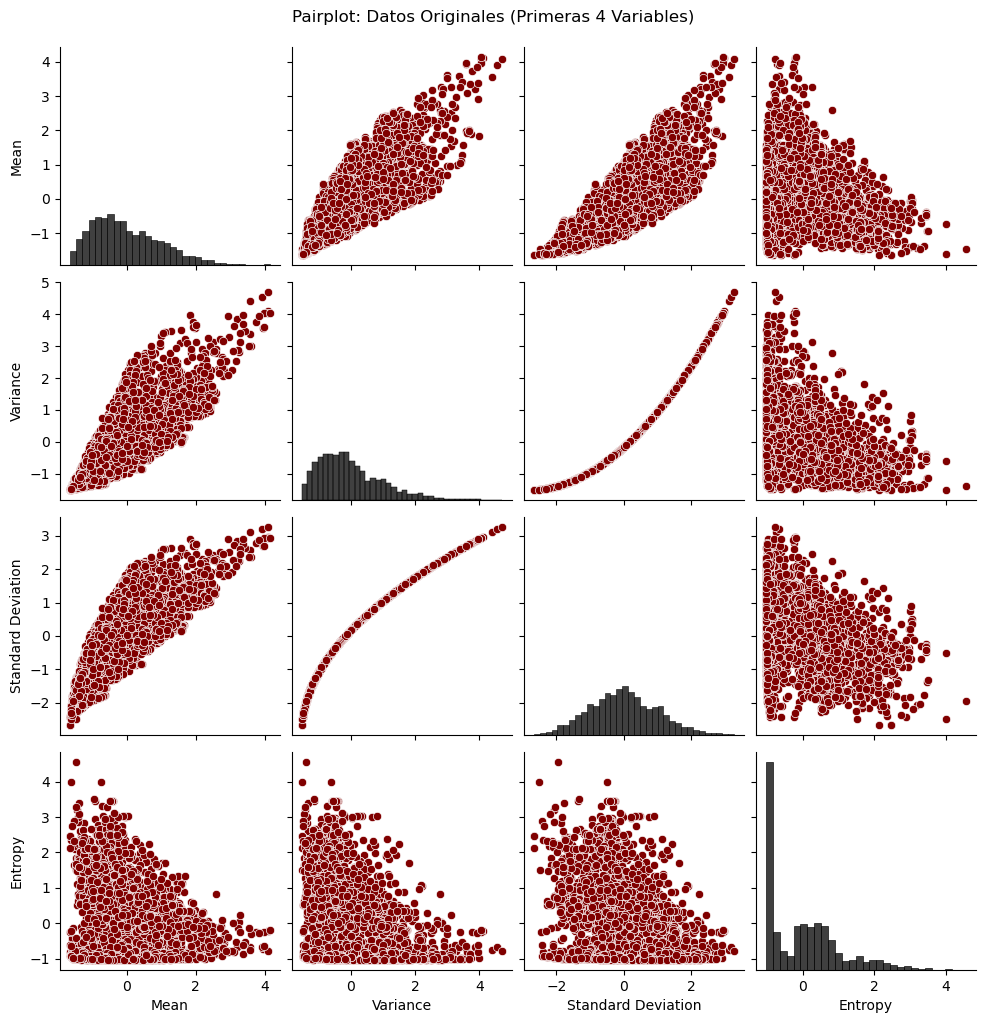

In [80]:
#Graficar datos originales 
sns.pairplot(df_sub, plot_kws={"color": "maroon"}, diag_kws={"color": "black"})
plt.suptitle("Pairplot: Datos Originales (Primeras 4 Variables)", y=1.02)
plt.show()

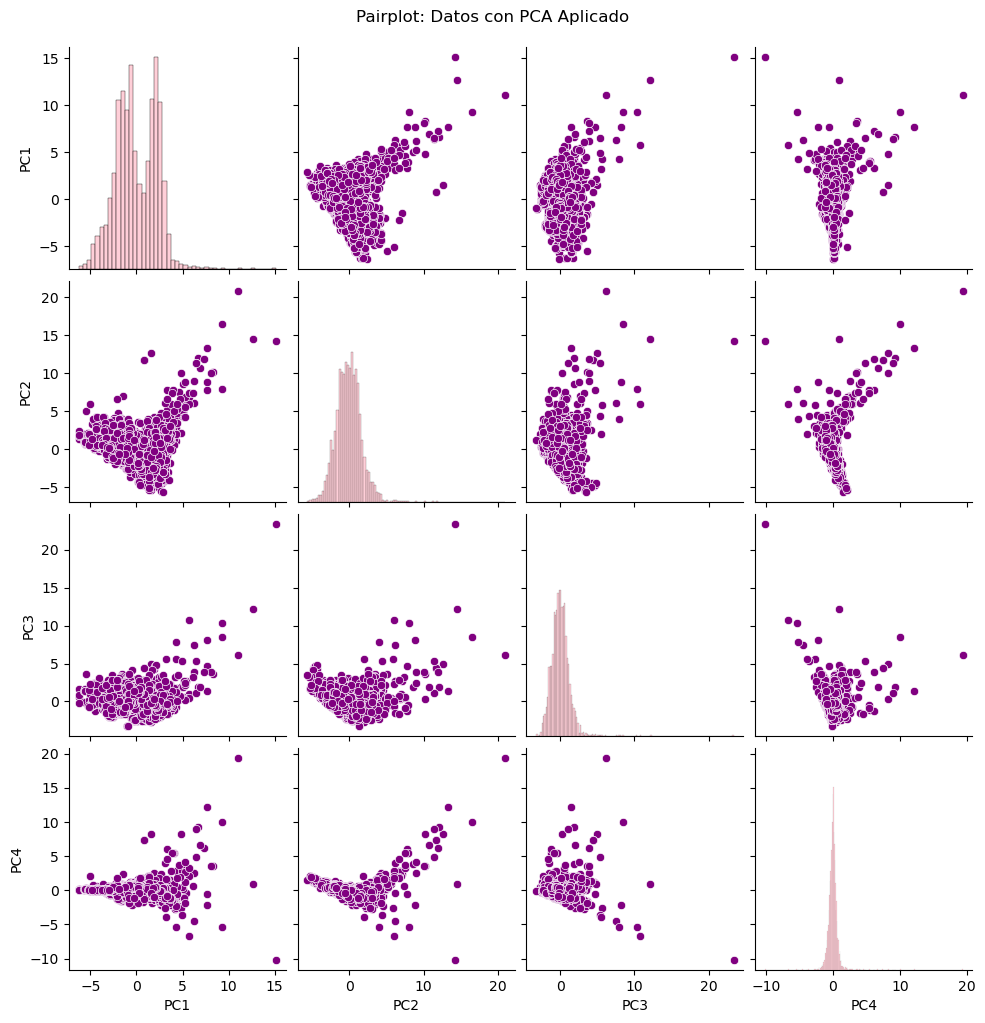

In [74]:
sns.pairplot(df_1pca, plot_kws={"color": "purple"}, diag_kws={"color": "pink"})
plt.suptitle("Pairplot: Datos con PCA Aplicado", y=1.02)
plt.show()